<Center>
  
# Erasmus Mundus JMD Nuclear Physics  
### Computational and Numerical Physics Monte Carlo Exercise Set 1 


###### Craig Michie

<Center>
<hr>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import math
import random
np.warnings.filterwarnings('ignore')
from scipy.interpolate import CubicSpline

##### Problem 1: Calculate $\pi$ following the strategy on slides

a) Plot the error of calculated $\pi$ as a function of points N generated (N=100, 1000, 5000, 10000...)

b) Plot the relative error of $\pi$ as a function of $\frac{1}{\sqrt(N)}$

In [2]:
'''
Function that evaluates pi by using random numbers and the
acceptance-rejection method
'''
def PiEstimate(nPairs):
    test_points = []
    in_circle = []
    
    for point in range(nPairs):
        #get test point coords
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        test_points.append((x,y))
        
        if (np.sqrt(x*x+y*y)) <=1:
            in_circle.append((x,y))
            
        pi = 4*len(in_circle)/nPairs
   
    return pi

The estimated value of Pi is:  3.32 for  100 steps
The estimated value of Pi is:  3.148 for  1000 steps
The estimated value of Pi is:  3.1664 for  5000 steps
The estimated value of Pi is:  3.1392 for  10000 steps


Text(0.5, 1.0, 'b) Relative Error as a function of 1/sqrt(N)')

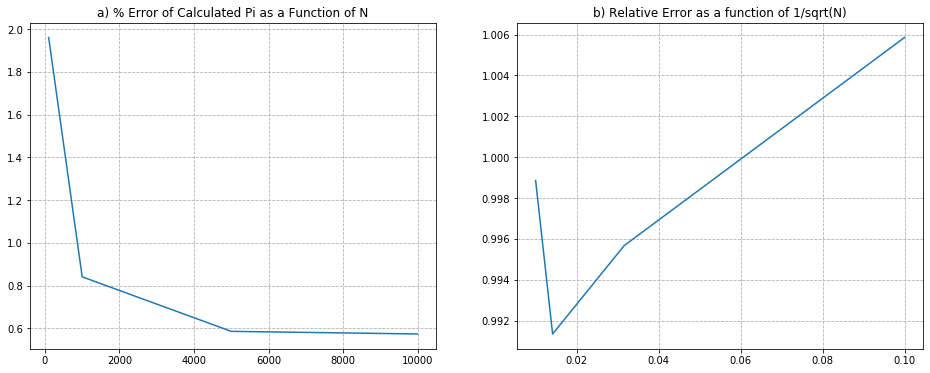

In [3]:
#Initial Conditions
N =(100,1000,5000,10000)
errorl = []
relerror = []

for n in (N):
    '''
    Loop to evaluate the estimated pi value based of the number of steps and
    the errors asked for in part a) and b)
    '''
    print('The estimated value of Pi is: ',PiEstimate(n),'for ',n,'steps')
    errorl.append(((np.abs(PiEstimate(n)-np.pi))/np.pi)*100)
    relerror.append(PiEstimate(n)/np.pi)
    
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
#Plotting the data
axarr[0].plot(N,errorl)
axarr[0].grid(linestyle= 'dashed')
axarr[0].set_title('a) % Error of Calculated Pi as a Function of N')

axarr[1].plot(1/np.sqrt(N),relerror)
axarr[1].grid(linestyle='dashed')
axarr[1].set_title('b) Relative Error as a function of 1/sqrt(N)')

##### Problem 2: Produce a 2D uniform distribution of points within a circle of radius R = 3.0. Use both the inverse transform method and the acceptance-rejection method.

a) Shoot 1e+6 points. Plot a 2D histogram with the positions obtained (use bins of size 0.1 x 0.1)

In [80]:
#Redefining the function from problem 1 so it returns the test point list

def PiEstimate(nPairs):
    #adjusted so that R = 3 
    test_points = []
    in_circle = []

    for point in range(nPairs):
        #get test point coords
        x = random.uniform(-3,3)
        y = random.uniform(-3,3)
        test_points.append((x,y))

        if (np.sqrt(x*x+y*y)) <=3:
            in_circle.append((x,y))

        pi = 4*len(in_circle)/nPairs

    return in_circle, test_points, pi

def Inverse(R,N):
    '''
    Function that uses the inverse transform method 
    to create a circle of radius 3
    '''
    def rand_points(R):
        r = R*np.sqrt(random.uniform(0,1))
        theta = 2*np.pi*random.uniform(0,1)
        x, y = r*np.cos(theta), r*np.sin(theta)
        
        point = [x,y]
        
        return point
    
    points = []
    for n in range(N):
        points.append(rand_points(R))
   
    pi = np.array(points)
   
    
    fig = plt.plot(pi[:,0],pi[:,1],'.', markersize =0.1, alpha = 0.23)
    plt.grid(linestyle ='dashed')
    plt.title('Inverse Transform Method')
    
    return fig

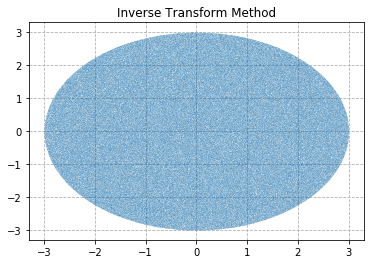

In [81]:
Inverse(3,1000000)

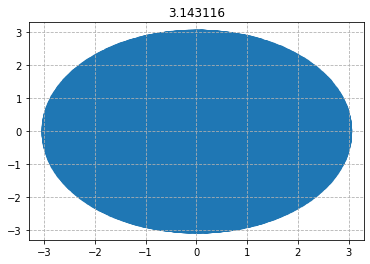

In [83]:
circlep, points, pi = PiEstimate(1000000)
points_plot = list(zip(*circlep))


ax = plt.gca()
plt.scatter(points_plot[0], points_plot[1], alpha = 0.1, cmap = 'prism')

ax.set_xlim(-3.3,3.3)
ax.set_ylim(-3.3,3.3)
ax.set_title(pi,fontsize=12)
ax.grid(linestyle = 'dashed')

##### Problem 3: Produce a code to simulate a particle source with the following features: point-like
source centered at the origin of coordinates and initial directions uniformly distributed
within a cone with angle aperture of 30 deg and oriented towards z < 0 (i.e., 150 deg ≤ 𝜃 ≤ 180 deg). Shoot 10 000 particles and plot a histogram illustrating the frequency distribution of cos(𝜃) and 𝜙.

In [7]:
def particle_distribution(particleNumber):
    '''
    Function 
    '''
    
    T_dist = []
    P_dist = []         
    for n in range(particleNumber):
        theta = random.uniform(-1,-0.866)
        phi = 1/6*np.pi*random.uniform(0,1) # pi/6 is unit circle for 30 degrees
        
        T_dist.append(theta)
        P_dist.append(phi)
    
    fig, axarr = fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    
    axarr[0].hist(T_dist, bins = 80,alpha = 0.5)
    axarr[1].hist(P_dist, bins = 80, alpha = 0.5)
    axarr[1].grid(linestyle = 'dashed')
    axarr[0].grid(linestyle = 'dashed')
    axarr[0].set_title('Distribution of cos(theta)')
    axarr[1].set_title('Distribution of phi')

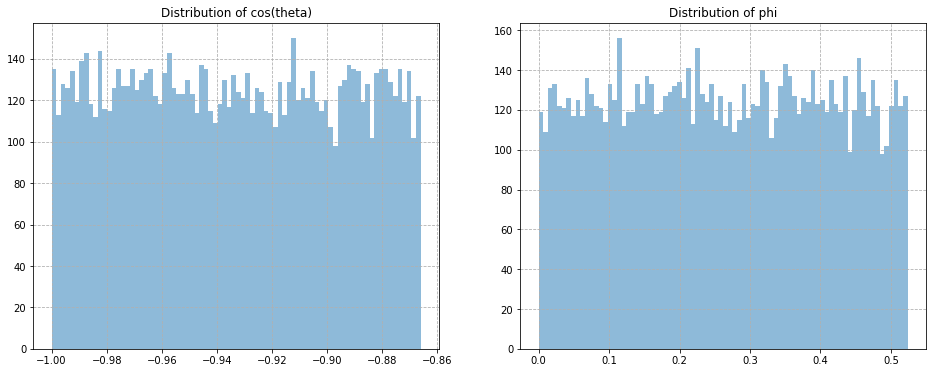

In [8]:
particle_distribution(10000)

##### Problem 4: You are given a scintillator material which output photons which wavelengths 𝜆 (between 400 and 700 nm) follow a distribution which can be modelled according to the following histogram:


In [9]:
d = {'Min':[400,450,500,550,600,650], 'Max':[450,500,550,600,650,700], 'Yield':[20,35,5,15,90,25]}
fd = pd.DataFrame(data=d)
fd

,Min,Max,Yield
0,400,450,20
1,450,500,35
2,500,550,5
3,550,600,15
4,600,650,90
5,650,700,25


a. Plot, as function of 𝜆, the original distribution yield and the distribution yield you have obtained with Monte Carlo methods after producing 100 000 random values. (Use the centroid of each lambda interval to plot each bin)

In [10]:
def OriginalSet():
    '''
    Function that creates the original histogram that will be used for comparison of the monte carlo method
    '''
    centre = []
    p=425
    for n in range(6):
        centre.append(p)
        p+=50


    yieldlist = [20,35,5,15,90,25]
    values = []

    for n, yield1 in enumerate(yieldlist):
        m = 0
        while m <=yield1:
                values.append(centre[n])
                m += 1
                
    return values

def MonteDist(rand):
    '''
    Function to analyze the distribution of 10000 random values
    to produce the same result as the given dataset. This is done through the 
    use of the probability each photon results in the wavelength
    '''
    centre = []
    p=425
    for n in range(6):
        centre.append(p)
        p+=50
    yieldlist = [20,35,5,15,90,25]
    total = np.sum(yieldlist)
    
    probability = []
    #print(np.sum(probability)) #---> used to check if probability ==1 which it does.
    for n, value in enumerate(yieldlist):
        probability.append(value/total)
    
    
    '''
    To select the frequency based off the measured probabilities it can easily 
    be performed using random.choices which takes the list of values as the first
    argument then takes the probability list as the second argument which is 
    used for the weight of the first argument and then k is just how many evaluations
    and then append the the choice to a list for the histogram
    '''
    tres = []  
    val = random.choices(centre,probability, k = rand)
    tres.append(val)
        

    return tres


In [11]:
def plotting(rand):
    '''
    Fuction to plot the two fuctions side by side
    '''
    a = OriginalSet()
    b = MonteDist(rand)
    fig, axarr = fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
    axarr[0].hist(a, bins = 6, alpha = 0.5)
    axarr[1].hist(b, bins = 6, alpha = 0.5)
    axarr[0].set_title('Histogram of Original Data Set')
    axarr[1].set_title('Histogram of Random Distribution')
    axarr[0].grid(linestyle = 'dashed')
    axarr[1].grid(linestyle = 'dashed')
    fig.show()
    

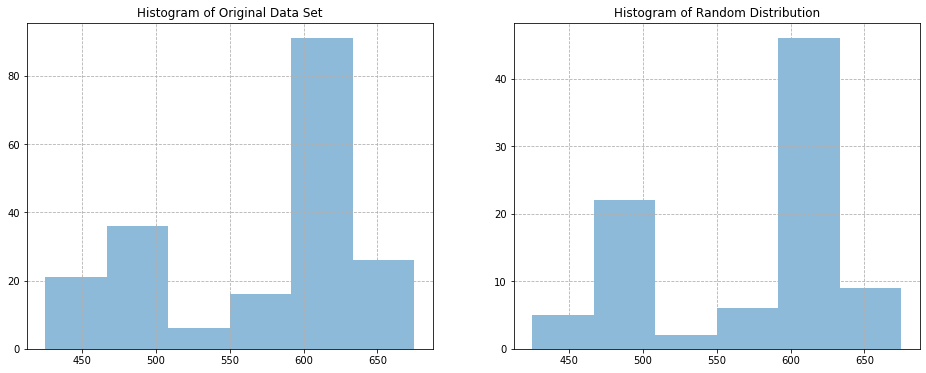

In [12]:
plotting(90)

##### Problem 5: Interpolate the distribution given above using either linear interpolation or (preferable) a cubic spline.

a. Use the interpolated result to sample 60 values uniformly distributed between 400 nm and 700 nm. Produce a new table, similar to that shown on the previous exercise.

b. Repeat exercise 4 with the newly created table.

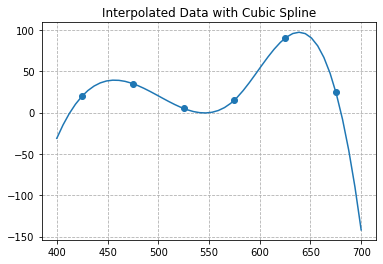

In [18]:
'''
Using the cubic spline to fit the data presented in the table from problem 4
'''
x = [425,475,525,575,625,675]
y = [20,35,5,15,90,25]
plt.scatter(x,y)

lm = scipy.interpolate.CubicSpline(x,y)

xs = np.linspace(400,700)
plt.plot(xs,lm(xs))
plt.grid(linestyle = 'dashed')
plt.title('Interpolated Data with Cubic Spline')
plt.show()


In [58]:
'''
Now to create a new table based off the interpolated graph
Using acceptance reception method for values under the plot
'''
#the variavbles that are needed 
lm_point = [] #acquires point from graph above
lm_x = []#the x variable of the point
lm_y = []#the y variable of the point
testy_point = []#some random point in the spectrum of the graph
under_plot = []#random points that are under the plot
net_counts = [] #occurance of bins list
q,w,e,r,t,y =0,0,0,0,0,0 #initial values of yield for the table


for n in range(400,700,5):              #this acquires the values from the graph about that will be tested under
    lm_point.append([n,float(lm(n))])   
    

for n in lm_point:      #want to seperate the list elements into x and y values for acc-rej. method
    lm_x.append(n[0])
    lm_y.append(n[1])


for n in range(1,61):
    point_x = random.uniform(400,700) #gets random values of lamda and counts for acc-rej method
    point_y = random.uniform(0,100)
    point = (point_x,point_y)
    testy_point.append(point)
    
for n, val in enumerate(testy_point):
    
    if val[1] < lm_y[n]: #returns the positions that are under the plot
        under_plot.append(val)

for n in under_plot:
    '''
    loop that checks the accepted lamdas and will organise them into their bins 
    where the number of lamdas are recorded for the yield portion of the table
    '''
    if n[0] <= 450 and n[0] >= 400:
        net_counts.append(425)
        q+=1
    elif n[0] <= 500 and n[0] >= 450:
        net_counts.append(475)
        w+=1
    elif n[0] <= 550 and n[0] >= 500:
        net_counts.append(525)
        e+=1
    elif n[0] <= 600 and n[0] >= 550:
        net_counts.append(575)
        r+=1
    elif n[0] <= 650 and n[0] >= 600:
        net_counts.append(625)
        t+=1
    elif n[0] <= 700 and n[0] >= 650:
        net_counts.append(675)
        y+=1
   
        
yieldlist = [q,w,e,r,t,y] #list of yield values for the table

dat = {'Min':[400,450,500,550,600,650], 'Max':[450,500,550,600,650,700], 'Yield': yieldlist}
ofd = pd.DataFrame(data=dat)
ofd

,Min,Max,Yield
0,400,450,1
1,450,500,4
2,500,550,5
3,550,600,3
4,600,650,4
5,650,700,4


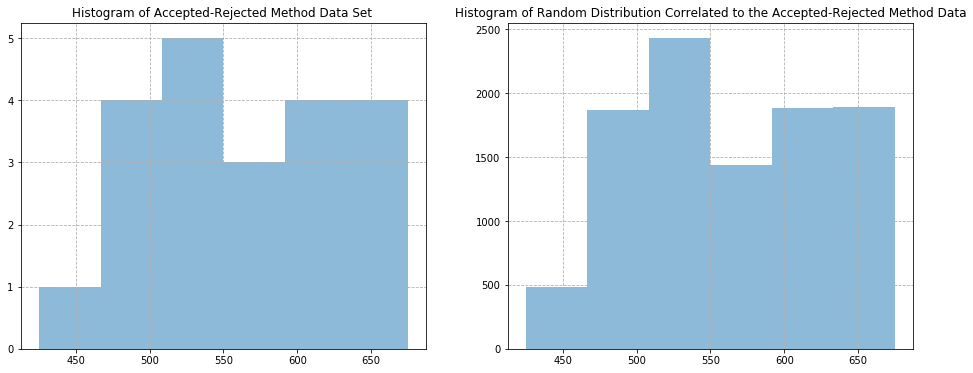

In [59]:
#Using the MonteDist code from above
centre = []
p=425

for n in range(6):
    centre.append(p)
    p+=50
    
total = np.sum(yieldlist)
probability = []

for n, value in enumerate(yieldlist):
    probability.append(value/total)

tres = []  
val = random.choices(centre,probability, k = 10000)
tres.append(val)
        

#plotting     
fig, axarr = fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
axarr[0].hist(net_counts, bins = 6, alpha = 0.5)
axarr[1].hist(tres, bins = 6, alpha = 0.5)
axarr[0].set_title('Histogram of Accepted-Rejected Method Data Set ')
axarr[1].set_title('Histogram of Random Distribution Correlated to the Accepted-Rejected Method Data')
axarr[0].grid(linestyle = 'dashed')
axarr[1].grid(linestyle = 'dashed')
fig.show()